## Introduction

The objective of the assignment was to determine the best neighborhood in Pittsburgh. Multiple variables could be analyzed, but we decided to focus on environmental factors. The neighborhood with the highest environmental rating will be determined as the best neighborhood in Pittsburgh.

**Metric: Trees**
* Database Link: https://data.wprdc.org/dataset/city-trees
    * Description: Trees cared for and managed by the City of Pittsburgh Department of Public Works Forestry Division. This does not account for the total trees in Pittsburgh, just those managed by the city.

**Metric: Playing Fields**
* Database Link: https://data.wprdc.org/dataset/playing-fields/resource/6af89346-b971-41d5-af09-49cfdb4dfe23
    * Description: Playing fields in the city of Pittsburgh.
    
**Metric: Playgrounds**
* Database Link: https://data.wprdc.org/dataset/playgrounds/resource/47350364-44a8-4d15-b6e0-5f79ddff9367
    * Description: Playgrounds in the city of Pittsburgh.

### Combined Data Analysis

In [8]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

To account for the great difference in numbers versus the amount of trees compared to the playgrounds and fields, the total amount of trees for each neighborhood was divided by 40. This allows for a fair comparison between all the neighborhoods.

In [3]:
data = pd.read_csv("Merged Data Sheet.csv")
newData = data.set_index('neighborhood')

azData = newData[['total']].sort_values(by='neighborhood', ascending=True)
sortedData = newData[['total']].sort_values(by='total', ascending=False)
# azData
# sortedData

In [4]:
azData.head()

total
neighborhood            
Allegheny Center      27
Allegheny West         9
Allentown              4
Arlington              3
Arlington Heights      0

Here you can see that we have summed all the data for each neighborhood to a total amount.

Text(0, 0.5, 'Leisure Metric')

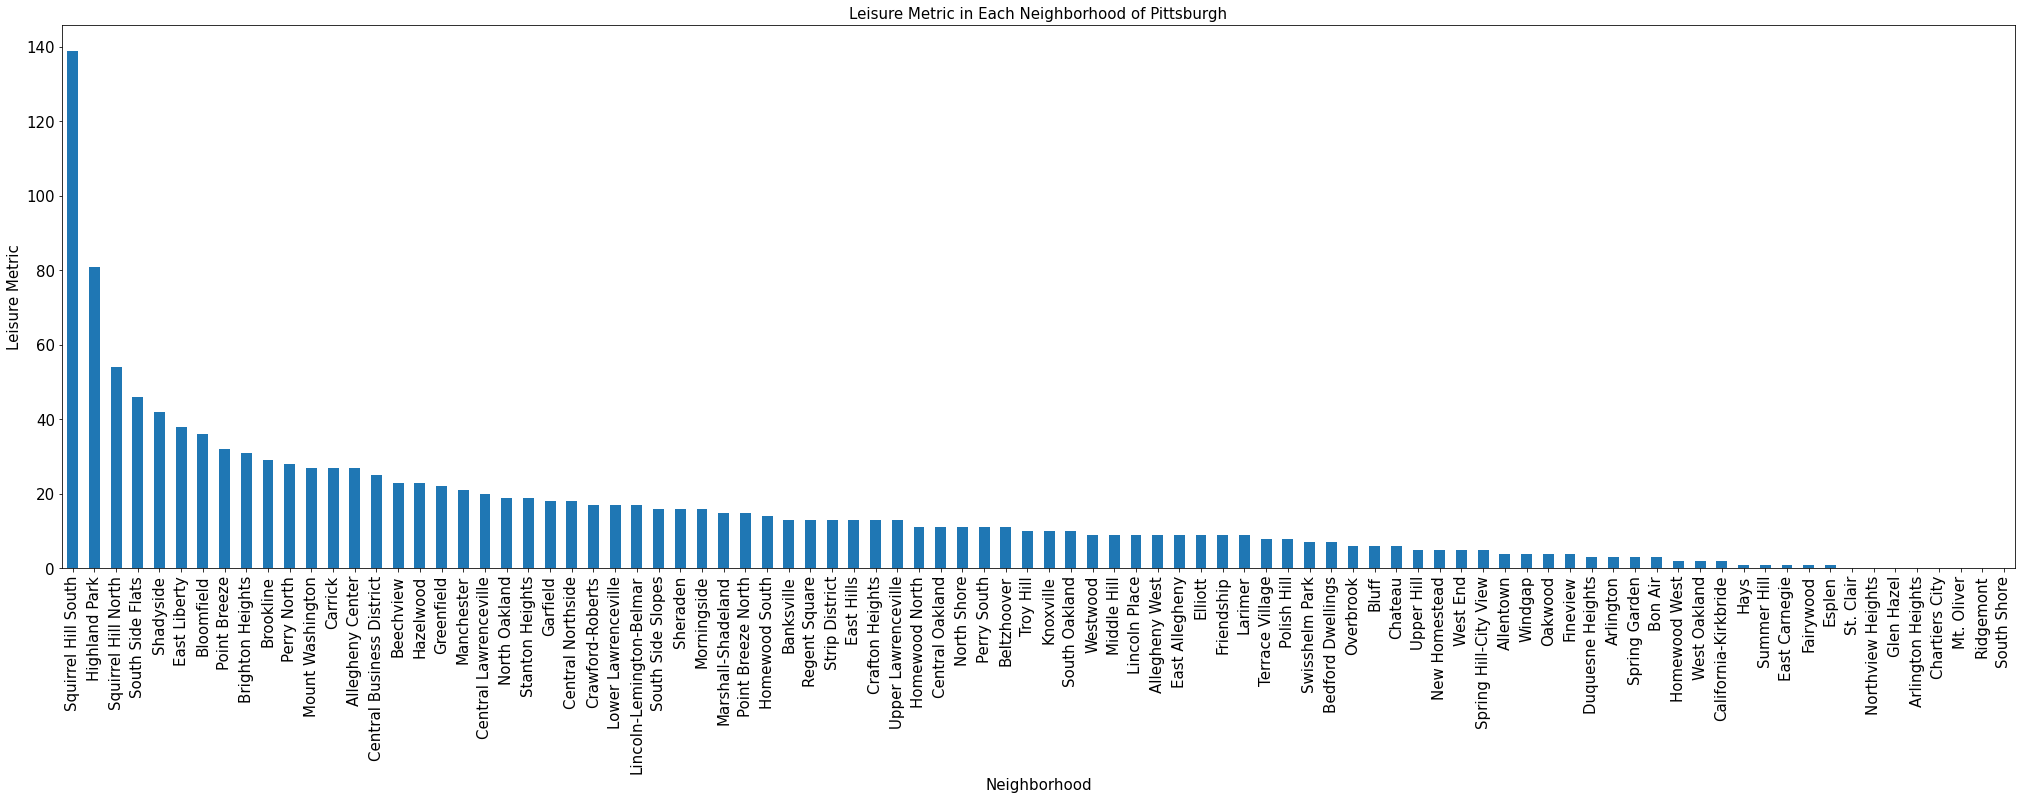

In [5]:
ax = sortedData.plot(kind='bar', figsize=(35,10),legend=False, fontsize=15)
ax.set_title("Leisure Metric in Each Neighborhood of Pittsburgh", fontsize=15)
ax.set_xlabel('Neighborhood', fontsize = 15)
ax.set_ylabel('Leisure Metric', fontsize = 15)

Text(0, 0.5, 'Leisure Metric')

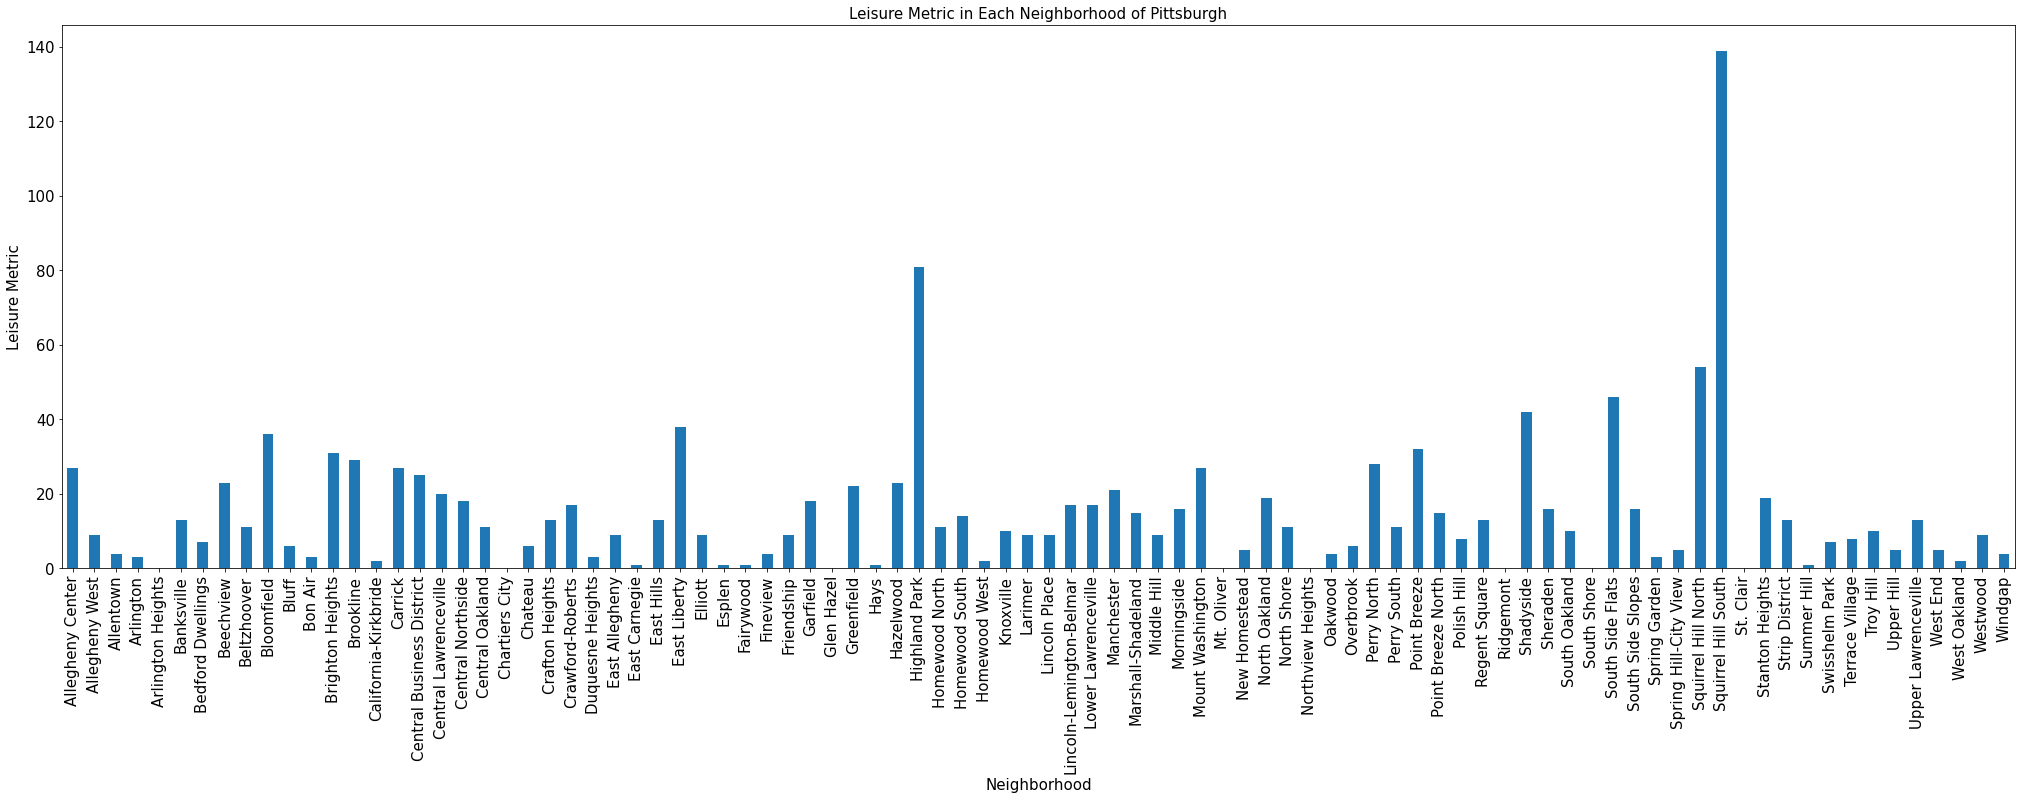

In [6]:
ax = azData.plot(kind='bar', figsize=(35,10),legend=False, fontsize=15)
ax.set_title("Leisure Metric in Each Neighborhood of Pittsburgh", fontsize=15)
ax.set_xlabel('Neighborhood', fontsize = 15)
ax.set_ylabel('Leisure Metric', fontsize = 15)

Text(0.5, 1.0, 'Point Totals')

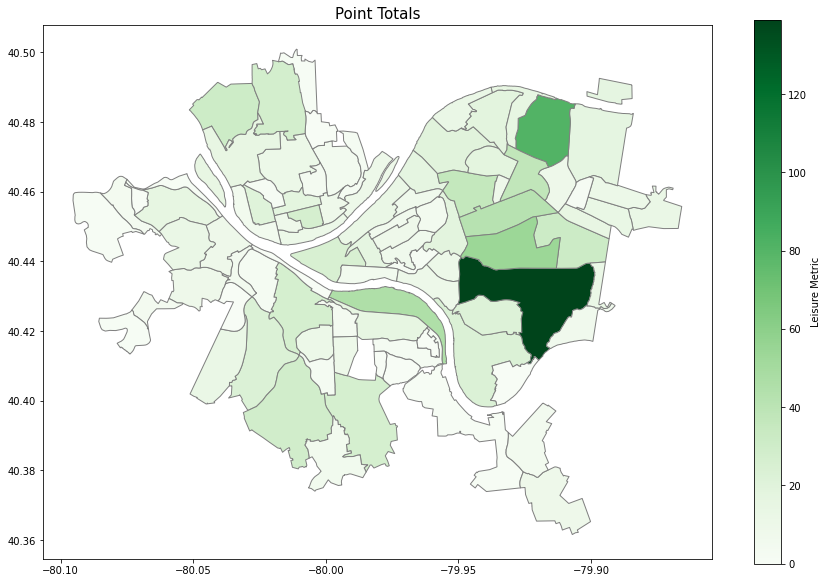

In [7]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
playground_map = neighborhoods.merge(sortedData, how="left", left_on="hood", right_on="neighborhood")
#playground_map.info()

map = playground_map.plot(column='total', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="grey",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Leisure Metric"}, # label the legend
               figsize=(15, 10),         # set the size
                # set disctricts with no data to gray
                   )
map.set_title("Point Totals", fontsize = 15)

In [21]:
sortedData.head(5)

total
neighborhood              
Squirrel Hill South    139
Highland Park           81
Squirrel Hill North     54
South Side Flats        46
Shadyside               42

### Conclusion

According to our data, we can conclude that the best neighborhood in Pittsburgh is Squirrel Hill South. The top 5 neighborhoods are as follows:
1. Squirrel Hill South
2. Highland Park
3. Squirrel Hill North
4. South Side Flats
5. Shadyside

It is also important to note that this would be the best neighborhood in Pittsburgh according to environmental variables, analyzing different variables would most likely result in semi-different neighborhoods as well.

### Summaries

#### Metric: Trees, Christopher Abboud
##### To summarize, I can conclude that the top 5 neighborhoods in pittsburgh are:
    1. Squirrell Hill South
    2. Highland Park
    3. Squirrell Hill North
    4. South Side Flats
    5. Shadyside

    The overall best neighborhood in pittsburgh based on the ammount of trees is Squirell Hill South. It is important to once again note the fact that this is not reflective of every tree in the pittsburgh area, just those managed by the city of Pittsburgh. Although this may seem like an issue at first, by realizing the fact the areas where the city takes most care of trees are the 
    areas which the city has higher presence in / interest in. It's also interesting to note that there are more trees in the inner city than there are in the outskirts, upon first thought one may think overwise.

#### Metric: Playing Fields, Ethan Fatzinger
Given the data (number of playing fields) the top 5 best neighborhoods are as follows:

1. Brighton Heights
2. Southside Slopes
3. Brookline
4. Carrick
5. Squirell Hill South

It is important to note that both Southside Slopes and Brookline have the same number of playing fields (6) and Carrick and Squirell Hill South have the same number as well (5). Brighton Heights has the most (7), meaning it has the most of all Pittsburgh Neighborhoods. This means it is the best and that residents of this neighborhood have the most fields available for sports. It is interesting to note that places furthur away from the downtown area have more playing fields (which is expected).
#### Metric: Playgrounds, Tyler Marzen
As clearly seen both the bar graph and map, Squirrel Hill South is the best neighborhood in Pittsburgh, according to my metric. My metric is purely quantitative, so the best neighborhood would simply be the neighborhood with the most amount of playgrounds. Following Squirell Hill South, the next best neighborhoods are Beechview, South Side Slopes, Allegheny Center, and Beltzhoover. It is important to note that this metric purely looks at playgrounds reported by the City of Pittsburgh Department of Public Works, so there may be other playgrounds that aren't accounted for. By using a different metric, it is completely possible for a different neighborhood to be determined as the best.